In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Aprendizaje/PracticaFinal/data.csv',encoding='unicode_escape')
# Utilizamos unicode_escape para gestionar la codificación
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# 1. Analisis de los datos

    InvoiceNo: Es un identificador único para cada transacción.
    StockCode: Un código que representa un producto en especifico en el inventario.
    Description: La descripción del producto.
    Quantity: La cantidad de cada producto en cada transacción.
    InvoiceDate: La fecha y hora de la transacción.
    UnitPrice: El precio por unidad del producto.
    CustomerID: Identificador único para cada cliente.
    Country: El país donde se ha hecho la transacción o donde el consumidor se encuentra.

## 1.1 Información de datos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Hay elementos que tienen cantidad negativa y el precio por unidad negativos por lo que eliminamos que tengan valor negativo o 0.

También tenemos menos datos en CustomerID por lo que hay valores nulos en esta columna.

## 1.2 Tipo de datos

In [ ]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

Tenemos la fecha en tipo object y es preferible tratarlos como datos del tipo datetime por lo que vamos a cambiar el tipo.

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

## 1.3 Valores nulos

In [ ]:
df['InvoiceNo'].unique()

array(['536365', '536366', '536367', ..., '581585', '581586', '581587'],
      dtype=object)

In [ ]:
df['InvoiceNo'].value_counts()

573585     1114
581219      749
581492      731
580729      721
558475      705
           ... 
554023        1
554022        1
554021        1
554020        1
C558901       1
Name: InvoiceNo, Length: 25900, dtype: int64

In [ ]:
df['CustomerID'].value_counts()

17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
           ... 
15070.0       1
15753.0       1
17065.0       1
16881.0       1
16995.0       1
Name: CustomerID, Length: 4372, dtype: int64

In [ ]:
(df.isna().sum().sort_values(ascending=False)/len(df)) * 100

CustomerID     24.926694
Description     0.268311
InvoiceNo       0.000000
StockCode       0.000000
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
Country         0.000000
dtype: float64

En CustomerID tenemos un 25% de valores nulos y algunas descripciones.

Por lo tanto eliminaremos la columna.

In [ ]:
df.drop(columns=['CustomerID'],inplace=True)

In [ ]:
(df.isna().sum().sort_values(ascending=False)/len(df)) * 100

Description    0.268311
InvoiceNo      0.000000
StockCode      0.000000
Quantity       0.000000
InvoiceDate    0.000000
UnitPrice      0.000000
Country        0.000000
dtype: float64

Ahora vemos los que tienen descripciones nulas.

In [ ]:
df[df['Description'].isnull()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,United Kingdom


In [ ]:
df[df['Description'].isnull()]['UnitPrice'].value_counts()

0.0    1454
Name: UnitPrice, dtype: int64

Podemos observar que todos los que no tienen descripción tienen valor 0 en el precio por unidad.

In [ ]:
df.dropna(inplace=True)

In [ ]:
(df.isna().sum().sort_values(ascending=False)/len(df)) * 100

InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
Country        0.0
dtype: float64

## 1.4 Valores erróneos

In [ ]:
df['Quantity'].value_counts()

 1        148101
 2         81763
 12        61049
 6         40846
 4         38461
           ...  
 3186          1
 291           1
 172           1
 3100          1
-80995         1
Name: Quantity, Length: 671, dtype: int64

Hay elementos que tienen cantidad negativa por lo que eliminamos que tengan valor negativo o 0 ya que no tiene sentido tener una cantidad negativa de algo.

In [ ]:
df = df[df['Quantity'] >0]

In [ ]:
df.sort_values(by=['UnitPrice'])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,United Kingdom
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,United Kingdom
41478,539856,22624,IVORY KITCHEN SCALES,3,2010-12-22 14:41:00,0.00,United Kingdom
41504,539856,21888,BINGO SET,2,2010-12-22 14:41:00,0.00,United Kingdom
41505,539856,21539,RED RETROSPOT BUTTER DISH,3,2010-12-22 14:41:00,0.00,United Kingdom
...,...,...,...,...,...,...,...
268028,560373,M,Manual,1,2011-07-18 12:30:00,4287.63,United Kingdom
297723,562955,DOT,DOTCOM POSTAGE,1,2011-08-11 10:14:00,4505.17,United Kingdom
173382,551697,POST,POSTAGE,1,2011-05-03 13:46:00,8142.75,United Kingdom
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,United Kingdom


En el precio hay valores negativos y ceros por lo que los eliminamos.

In [ ]:
df = df[df['UnitPrice'] >0]

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom


In [ ]:
df = df.set_index('InvoiceDate')

# Visualización de datos

In [ ]:
df['Sales'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,Sales
InvoiceDate,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom,15.30
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,United Kingdom,20.34
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,United Kingdom,22.00
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,United Kingdom,20.34
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,United Kingdom,20.34


<Axes: >

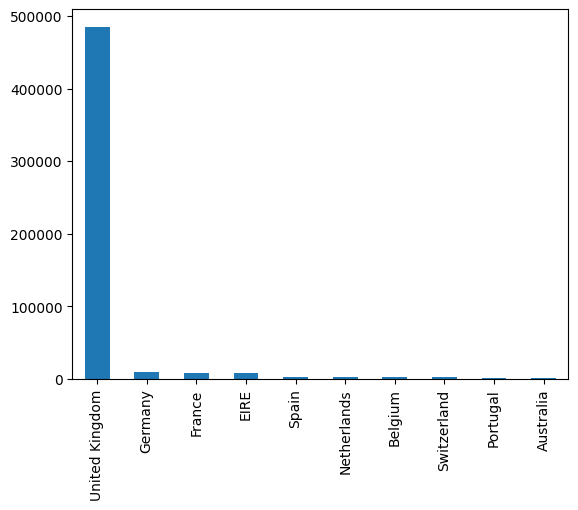

In [ ]:
df['Country'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar')

In [ ]:
uk_count = df[df['Country'] == 'United Kingdom']['Country'].count()
all_count = df['Country'].count()
porcentaje = uk_count/all_count
print(str('{0:.2f}%').format(porcentaje*100))

91.51%


Podemos observar que la mayoría de los datos pertenecen a Reino Unido por lo que podremos separar los datos entre aquellos que pertenecen a Reino Unido y aquellos que no.




En el siguiente gráfico podemos ver las ventas y observamos valores extraños que no siguen la normal por lo que al ser pocos casos podemos prescindir de ellos.

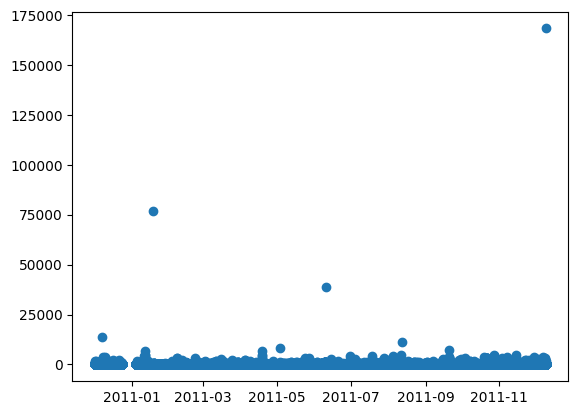

In [ ]:
plt.scatter(x=df.index, y=df['Sales'])

In [ ]:
df = df[df['Sales'] < 25000]

In [ ]:
df.quantile([0.05, 0.95, 0.98, 0.99])

<ipython-input-28-cdf06ce75b6e>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.quantile([0.05, 0.95, 0.98, 0.99])


,Quantity,UnitPrice,Sales
0.05,1.0,0.42,1.25
0.95,30.0,9.95,59.70
0.98,72.0,14.95,121.68
0.99,100.0,16.98,183.60


Podemos observar que tomando los datos del 98% inferior nos quedamos con datos más balanceados y mejores para la predicción. El precio por unidad en ese cuantil es de 14.95 que lo tomaremos luego para filtrar.

In [ ]:
df_ts = df[['Sales']]
df_ts.head()

,Sales
InvoiceDate,
2010-12-01 08:26:00,15.30
2010-12-01 08:26:00,20.34
2010-12-01 08:26:00,22.00
2010-12-01 08:26:00,20.34
2010-12-01 08:26:00,20.34


<Axes: xlabel='InvoiceDate'>

<Figure size 1800x600 with 0 Axes>

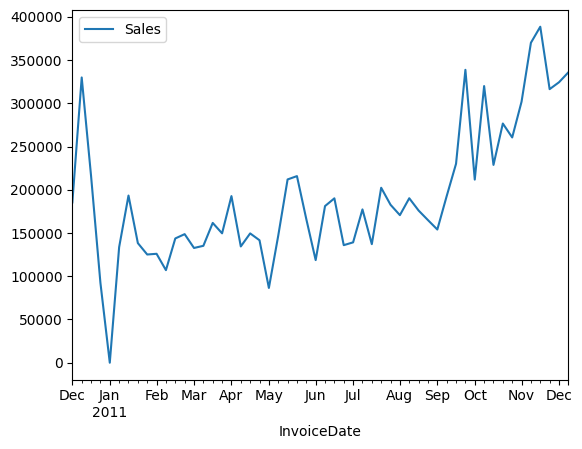

In [ ]:
plt.figure(figsize=(18,6))
df_ts.resample('W').sum().plot()

Hay un valor raro en una semana de enero que tenemos 0 ventas.

Al mirar, vemos que es la semana de año nuevo por lo que en esa semana habrán cerrado por vacaciones y por eso no habrá ventas.

In [ ]:
df_ts.resample('W').sum()[df_ts.resample('W').sum()['Sales']==0]

,Sales
InvoiceDate,
2011-01-02,0.0


# Limpieza de datos

In [ ]:
df_bueno = df[df['UnitPrice'] < 15]

Como en cada transacción hay más de un producto entonces podemos ver la cantidad de productos hay en cada transacción.

In [ ]:
df_cantidad = df_bueno.groupby('InvoiceNo')[['Quantity']].sum()

In [ ]:
df_cantidad = df_cantidad.reset_index()
df_cantidad.head()

,InvoiceNo,Quantity
0,536365,40
1,536366,12
2,536367,83
3,536368,15
4,536369,3


In [ ]:
df_bueno.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,Sales
InvoiceDate,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom,15.30
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,United Kingdom,20.34
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,United Kingdom,22.00
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,United Kingdom,20.34
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,United Kingdom,20.34


In [ ]:
df_cantidad

,InvoiceNo,Quantity
0,536365,40
1,536366,12
2,536367,83
3,536368,15
4,536369,3
...,...,...
19749,581583,76
19750,581584,120
19751,581585,278
19752,581586,66


Al hacer el merge vamos a perder el indice que es la fecha por lo que la guardamos en una variable.

In [ ]:
df_bueno['InvoiceDate'] = df_bueno.index
df_bueno = df_bueno.merge(df_cantidad, how='right', on='InvoiceNo')
df_bueno = df_bueno.rename(columns={'Quantity_x' : 'Quantity', 'Quantity_y' : 'QuantityInv'})


<ipython-input-37-fc37782c3864>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bueno['InvoiceDate'] = df_bueno.index


In [ ]:
df_bueno.head(10)

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,Sales,InvoiceDate,QuantityInv
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom,15.30,2010-12-01 08:26:00,40
1,536365,71053,WHITE METAL LANTERN,6,3.39,United Kingdom,20.34,2010-12-01 08:26:00,40
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,United Kingdom,22.00,2010-12-01 08:26:00,40
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,United Kingdom,20.34,2010-12-01 08:26:00,40
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,United Kingdom,20.34,2010-12-01 08:26:00,40
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,7.65,United Kingdom,15.30,2010-12-01 08:26:00,40
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,4.25,United Kingdom,25.50,2010-12-01 08:26:00,40
7,536366,22633,HAND WARMER UNION JACK,6,1.85,United Kingdom,11.10,2010-12-01 08:28:00,12
8,536366,22632,HAND WARMER RED POLKA DOT,6,1.85,United Kingdom,11.10,2010-12-01 08:28:00,12
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,1.69,United Kingdom,54.08,2010-12-01 08:34:00,83


Podemos observar que las 7 primeras filas pertenecen a la misma transacción y si sumas la cantidad individual de cada tipo de elemento, sale el valor de la columna de cantidad por transacción.

In [ ]:
df_bueno.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
UnitPrice             float64
Country                object
Sales                 float64
InvoiceDate    datetime64[ns]
QuantityInv             int64
dtype: object

Para los datos de cantidad y de precio vamos a tomar rangos para que no sean solo números separados y predecir mejor.

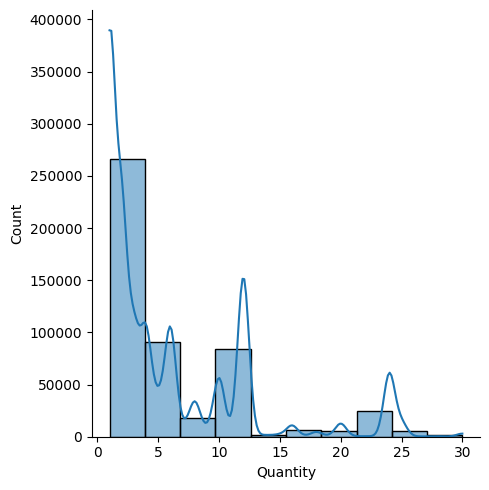

In [ ]:
sns.displot(df[df['Quantity'] <= 30]['Quantity'], kde=True, bins=10)

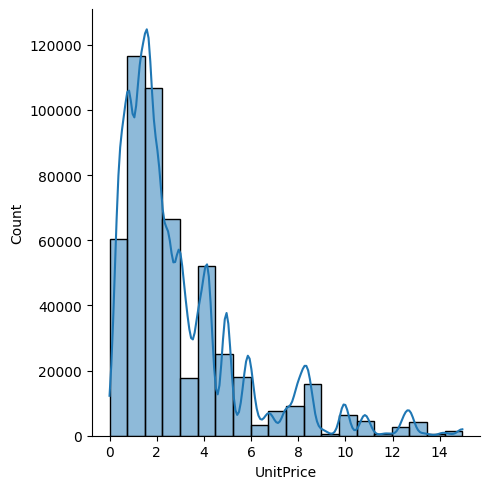

In [ ]:
sns.displot(df_bueno['UnitPrice'], kde=True, bins=20)

In [ ]:
df['Quantity'].describe()

count    530101.000000
mean         10.249190
std          37.793522
min           1.000000
25%           1.000000
50%           3.000000
75%          10.000000
max        4800.000000
Name: Quantity, dtype: float64

In [ ]:
bins_q = pd.IntervalIndex.from_tuples([(0, 4),(4, 8), (8, 9), (9, 13), (13, 4800)])
df_bueno['QuantityRange'] = pd.cut(df_bueno['Quantity'], bins=bins_q)
bins_p = pd.IntervalIndex.from_tuples([(0, 1), (1, 2), (2, 3), (3, 5), (5, 15)])
df_bueno['PriceRange'] = pd.cut(df_bueno['UnitPrice'], bins=bins_p)
df_bueno.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,Sales,InvoiceDate,QuantityInv,QuantityRange,PriceRange
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom,15.30,2010-12-01 08:26:00,40,"(4, 8]","(2, 3]"
1,536365,71053,WHITE METAL LANTERN,6,3.39,United Kingdom,20.34,2010-12-01 08:26:00,40,"(4, 8]","(3, 5]"
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,United Kingdom,22.00,2010-12-01 08:26:00,40,"(4, 8]","(2, 3]"
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,United Kingdom,20.34,2010-12-01 08:26:00,40,"(4, 8]","(3, 5]"
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,United Kingdom,20.34,2010-12-01 08:26:00,40,"(4, 8]","(3, 5]"


Ya hemos simplificado la cantidad y el precio, tenemos el mismo problema con la fecha por lo que vamos a agruparlos por trimestres.

In [ ]:
bins_d = pd.IntervalIndex.from_tuples([(0,3),(3,6),(6,9),(9,12)])
df_bueno['DateRange'] = pd.cut(df_bueno['InvoiceDate'].dt.month, bins=bins_d, labels=['q1','q2','q3','q4'])
df_bueno.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,Sales,InvoiceDate,QuantityInv,QuantityRange,PriceRange,DateRange
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom,15.30,2010-12-01 08:26:00,40,"(4, 8]","(2, 3]","(9, 12]"
1,536365,71053,WHITE METAL LANTERN,6,3.39,United Kingdom,20.34,2010-12-01 08:26:00,40,"(4, 8]","(3, 5]","(9, 12]"
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,United Kingdom,22.00,2010-12-01 08:26:00,40,"(4, 8]","(2, 3]","(9, 12]"
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,United Kingdom,20.34,2010-12-01 08:26:00,40,"(4, 8]","(3, 5]","(9, 12]"
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,United Kingdom,20.34,2010-12-01 08:26:00,40,"(4, 8]","(3, 5]","(9, 12]"


Ahora separamos los datos entre datos de Reino Unido y datos del resto del mundo y utilizaremos los datos de Reino Unido.

In [ ]:
df_uk = df_bueno[df_bueno['Country'] == 'United Kingdom']

Ahora simplificamos los datos para coger los más representativos.

In [ ]:
df_model = df_uk[['Sales', 'QuantityInv', 'QuantityRange', 'PriceRange', 'DateRange']]
df_model.head()

,Sales,QuantityInv,QuantityRange,PriceRange,DateRange
0,15.30,40,"(4, 8]","(2, 3]","(9, 12]"
1,20.34,40,"(4, 8]","(3, 5]","(9, 12]"
2,22.00,40,"(4, 8]","(2, 3]","(9, 12]"
3,20.34,40,"(4, 8]","(3, 5]","(9, 12]"
4,20.34,40,"(4, 8]","(3, 5]","(9, 12]"


In [ ]:
df_model = pd.get_dummies(df_model, columns=['QuantityRange'], prefix='qr')
df_model = pd.get_dummies(df_model, columns=['PriceRange'], prefix='pr')
df_model = pd.get_dummies(df_model, columns=['DateRange'], prefix='dr')
df_model.head()

,Sales,QuantityInv,"qr_(0, 4]","qr_(4, 8]","qr_(8, 9]","qr_(9, 13]","qr_(13, 4800]","pr_(0, 1]","pr_(1, 2]","pr_(2, 3]","pr_(3, 5]","pr_(5, 15]","dr_(0, 3]","dr_(3, 6]","dr_(6, 9]","dr_(9, 12]"
0,15.30,40,0,1,0,0,0,0,0,1,0,0,0,0,0,1
1,20.34,40,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,22.00,40,0,1,0,0,0,0,0,1,0,0,0,0,0,1
3,20.34,40,0,1,0,0,0,0,0,0,1,0,0,0,0,1
4,20.34,40,0,1,0,0,0,0,0,0,1,0,0,0,0,1


# Modelo

Primero escalaremos la cantidad de elemento por transacción.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
column_to_scale = df_model[['QuantityInv']]
df_model[['QuantityInv']] = scaler.fit_transform(column_to_scale)

In [ ]:
df_model.head()

,Sales,QuantityInv,"qr_(0, 4]","qr_(4, 8]","qr_(8, 9]","qr_(9, 13]","qr_(13, 4800]","pr_(0, 1]","pr_(1, 2]","pr_(2, 3]","pr_(3, 5]","pr_(5, 15]","dr_(0, 3]","dr_(3, 6]","dr_(6, 9]","dr_(9, 12]"
0,15.30,0.002757,0,1,0,0,0,0,0,1,0,0,0,0,0,1
1,20.34,0.002757,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,22.00,0.002757,0,1,0,0,0,0,0,1,0,0,0,0,0,1
3,20.34,0.002757,0,1,0,0,0,0,0,0,1,0,0,0,0,1
4,20.34,0.002757,0,1,0,0,0,0,0,0,1,0,0,0,0,1


In [ ]:
X = df_model.drop(columns=['Sales'])
y = df_model['Sales']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

Dado que se está trabajando con datos de series temporales y tenemos una variable objetivo (Sales), cogeremos modelos como las Redes Neuronales Recurrentes (RNN) y las Redes Neuronales Convolucionales 1D.

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

In [3]:
model = Sequential()
model.add(SimpleRNN(50, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

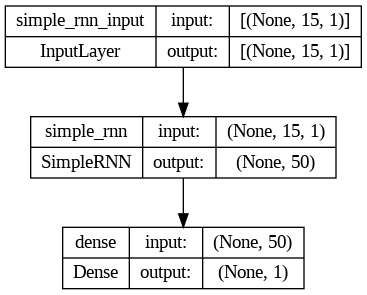

In [4]:
from keras.utils import plot_model
plot_model(model, to_file='RNN.png', show_shapes=True)

In [ ]:
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0)

In [ ]:
mse = model.evaluate(X_test, y_test)
print(f'Mean Squared Error on Test Set: {mse}')

2982/2982 [==============================] - 24s 8ms/step - loss: 3442.5842
Mean Squared Error on Test Set: 3442.584228515625


In [ ]:
model.save_weights('/content/drive/MyDrive/Aprendizaje/PracticaFinal/RNN.h5')

Ahora creamos una red con capas convolucionales

In [5]:
from tensorflow.keras.layers import Conv1D, Flatten

In [7]:
model_cnn = Sequential()
model_cnn.add(Conv1D(256, kernel_size=2, activation='relu', input_shape=(15, 1)))
model_cnn.add(Conv1D(128, kernel_size=2, activation='relu'))
model_cnn.add(Flatten())
model_cnn.add(Dense(1))

In [8]:
model_cnn.compile(optimizer='adam', loss='mean_squared_error')

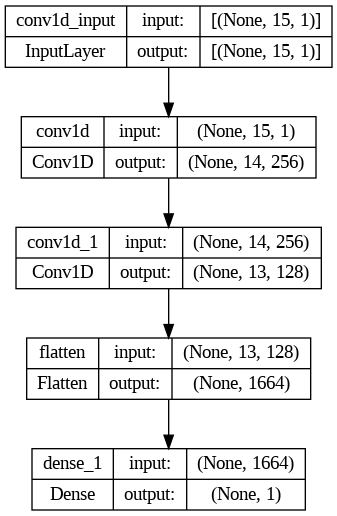

In [10]:
plot_model(model_cnn, to_file='Conv1D.png', show_shapes=True)

In [ ]:
model_cnn.fit(X_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
11925/11925 [==============================] - 48s 4ms/step - loss: 3020.6360
Epoch 2/20
11925/11925 [==============================] - 47s 4ms/step - loss: 2868.3789
Epoch 3/20
11925/11925 [==============================] - 47s 4ms/step - loss: 2840.7734
Epoch 4/20
11925/11925 [==============================] - 46s 4ms/step - loss: 2836.9653
Epoch 5/20
11925/11925 [==============================] - 47s 4ms/step - loss: 2829.1252
Epoch 6/20
11925/11925 [==============================] - 45s 4ms/step - loss: 2823.3071
Epoch 7/20
11925/11925 [==============================] - 46s 4ms/step - loss: 2818.1785
Epoch 8/20
11925/11925 [==============================] - 47s 4ms/step - loss: 2815.6365
Epoch 9/20
11925/11925 [==============================] - 46s 4ms/step - loss: 2816.5764
Epoch 10/20
11925/11925 [==============================] - 47s 4ms/step - loss: 2816.2715
Epoch 11/20
11925/11925 [==============================] - 46s 4ms/step - loss: 2815.0383
Epoch 12/20
11925/1

In [ ]:
# Evaluar el modelo
mse_cnn = model_cnn.evaluate(X_test, y_test)
print(f'Mean Squared Error on Test Set (CNN): {mse_cnn}')

2982/2982 [==============================] - 7s 2ms/step - loss: 3469.5178
Mean Squared Error on Test Set (CNN): 3469.517822265625


In [ ]:
model_cnn.save_weights('/content/drive/MyDrive/Aprendizaje/PracticaFinal/Conv1D.h5')

# Datos para Label Studio

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df2=pd.read_excel('/content/drive/MyDrive/Aprendizaje/PracticaFinal/All_kits.xlsx')

In [ ]:
df2.shape

(1485, 4)

In [ ]:
df2.head()

,Kit Name,Kit Link,Kit Photo,forma_tur
0,2021-22 FC Groningen Away Shirt *BNIB*,https://www.classicfootballshirts.co.uk/2021-2...,https://images.classicfootballshirts.co.uk/pub...,EREDIVISIE_kits
1,2021-22 Groningen Home Shirt *BNIB*,https://www.classicfootballshirts.co.uk/2021-2...,https://images.classicfootballshirts.co.uk/pub...,EREDIVISIE_kits
2,2021-22 Den Bosch Home Shirt *BNIB*,https://www.classicfootballshirts.co.uk/2021-2...,https://images.classicfootballshirts.co.uk/pub...,EREDIVISIE_kits
3,2021-22 Ado Den Haag Home Shirt *BNIB*,https://www.classicfootballshirts.co.uk/2021-2...,https://images.classicfootballshirts.co.uk/pub...,EREDIVISIE_kits
4,2010-11 Feyenoord Home Shirt (Excellent) L,https://www.classicfootballshirts.co.uk/2010-1...,https://images.classicfootballshirts.co.uk/pub...,EREDIVISIE_kits


In [ ]:
df2["Camisetas"] = np.nan

In [ ]:
urls=df2['Kit Photo']

In [ ]:
import requests
from PIL import Image
from io import BytesIO
urls_malas=[]
def descargar_imagenes(urls):
    imagenes = []

    for url in urls:
        try:
            response = requests.get(url)
            response.raise_for_status()


            img = Image.open(BytesIO(response.content))

            imagenes.append(img)
        except Exception as e:
            print(f"Error al descargar la imagen desde {url}: {e}")
            urls_malas.append(url)

    return imagenes

# Ejemplo de uso:
urls_de_imagenes = [
    df2['Kit Photo'][0],
    df2['Kit Photo'][1],
    df2['Kit Photo'][2],
]

imagenes_descargadas = descargar_imagenes(urls)
imagenes=[]
i=0
# Puedes trabajar con el array 'imagenes_descargadas' según tus necesidades
for idx, imagen in enumerate(imagenes_descargadas):
  df2['Camisetas'][i]=imagen
  i+=1


Error al descargar la imagen desde https://images.classicfootballshirts.co.uk/pub/media/catalog/product/b/a/barca-05-home_13_1_1_1_1_1_2_1_1_2_2_2_2_1_1_1_1_1_1_3_1_2_1_2_2_2_1_1_1_1_2_1_1_1_1_2_1_1_1_1_1_2_1_2_1.jpg/tr:w-500,h-500,dpr-2,q-50,cm-pad_resize: 404 Client Error: Not Found for url: https://images.classicfootballshirts.co.uk/pub/media/catalog/product/b/a/barca-05-home_13_1_1_1_1_1_2_1_1_2_2_2_2_1_1_1_1_1_1_3_1_2_1_2_2_2_1_1_1_1_2_1_1_1_1_2_1_1_1_1_1_2_1_2_1.jpg/tr:w-500,h-500,dpr-2,q-50,cm-pad_resize
Error al descargar la imagen desde https://images.classicfootballshirts.co.uk/pub/media/catalog/product/r/e/real-madrid-10-away-use_1_1_1_1_1_1_3_1_1_1_3_2.jpg/tr:w-500,h-500,dpr-2,q-50,cm-pad_resize: 404 Client Error: Not Found for url: https://images.classicfootballshirts.co.uk/pub/media/catalog/product/r/e/real-madrid-10-away-use_1_1_1_1_1_1_3_1_1_1_3_2.jpg/tr:w-500,h-500,dpr-2,q-50,cm-pad_resize
Error al descargar la imagen desde https://images.classicfootballshirts.co.uk/pu

In [ ]:
df2=df2[~df2["Kit Photo"].isin(urls_malas)]

In [ ]:
df2.reset_index(inplace=True,drop=True)

In [ ]:
df2.shape

(1437, 5)

In [ ]:
df2.to_csv('/content/drive/MyDrive/Aprendizaje/PracticaFinal/camisetasbueno.csv')

In [ ]:
df2.to_excel('/content/drive/MyDrive/Aprendizaje/PracticaFinal/camisetasbueno.xlsx')

In [ ]:
df2[df2['Kit Name'].str.contains('getafe', case=False)]

,Kit Name,Kit Link,Kit Photo,forma_tur,Camisetas
165,2013-14 Getafe Home Shirt (Excellent) L,https://www.classicfootballshirts.co.uk/2013-1...,https://images.classicfootballshirts.co.uk/pub...,LaLiga_kits,<PIL.JpegImagePlugin.JpegImageFile image mode=...


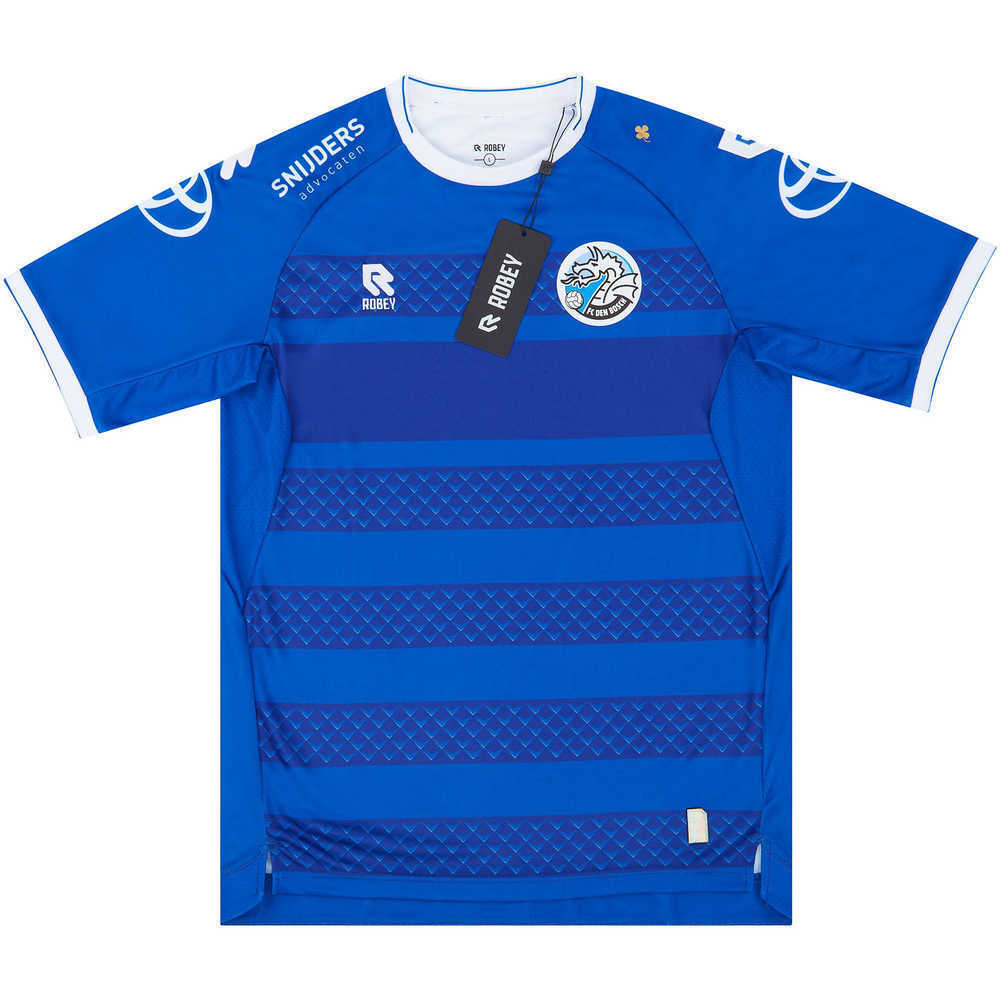

In [ ]:
df2['Camisetas'][2]

Ahora vamos a hacer un dataset solo con las imagenes.

In [ ]:
df2.drop(['Kit Name','Kit Link','Kit Photo','forma_tur'],axis=1,inplace=True)

In [ ]:
df2.to_csv('/content/drive/MyDrive/Aprendizaje/PracticaFinal/camisetasbuenocomprimido.csv')